In [19]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
#read the data frame
df = pd.read_csv("news.csv")

In [21]:
#Get the shape of DF
df.shape

(44919, 6)

In [22]:
#Get the first five rows of the dataset
df.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# Data Preprocessing


In [23]:
#Dropping the unuseful columns
df = df.drop(["title", "subject","date"], axis = 1)

In [24]:
#checking null values
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [25]:
#shuffle the dataset
df =df.sample(frac=1)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

<Axes: xlabel='class', ylabel='count'>

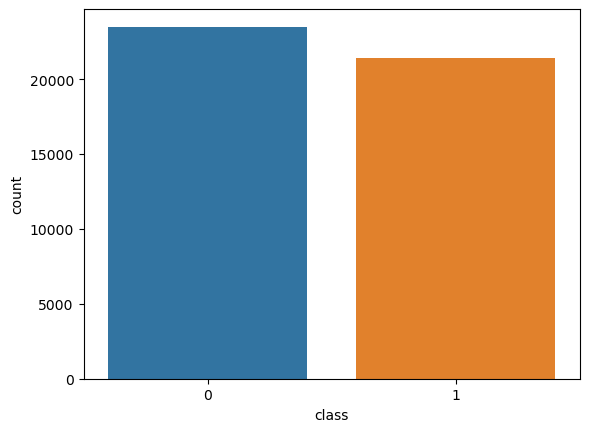

In [26]:
#exploring unique values
sns.countplot(df,x='class',order = df['class'].value_counts().index)

# Preprocessing and analysis of news column

In [27]:
#Import required libraries
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
#Creating function
def preprocess_text(text_data):
	preprocessed_text = []
	stop_words = set(stopwords.words('english'))

	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence).lower()
		words = word_tokenize(sentence)
		words = [word for word in words if word not in stop_words]
		sentence = ' '.join(words)
		preprocessed_text.append(sentence)

	return preprocessed_text


In [51]:
#  implement the function in all the news in the text column
preprocessed_review = preprocess_text(df['text'].values)
df['text'] = preprocessed_review


100%|██████████| 44919/44919 [01:15<00:00, 594.56it/s]


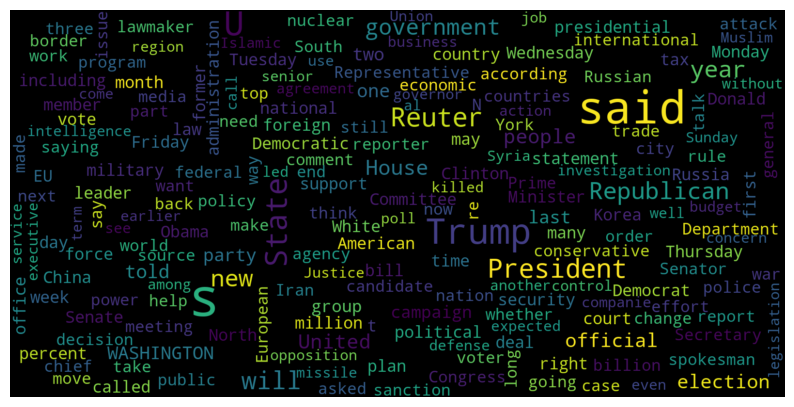

In [40]:
# visualize the WordCloud for real news

consolidated = ' '.join(
	word for word in df['text'][df['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(10, 8))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


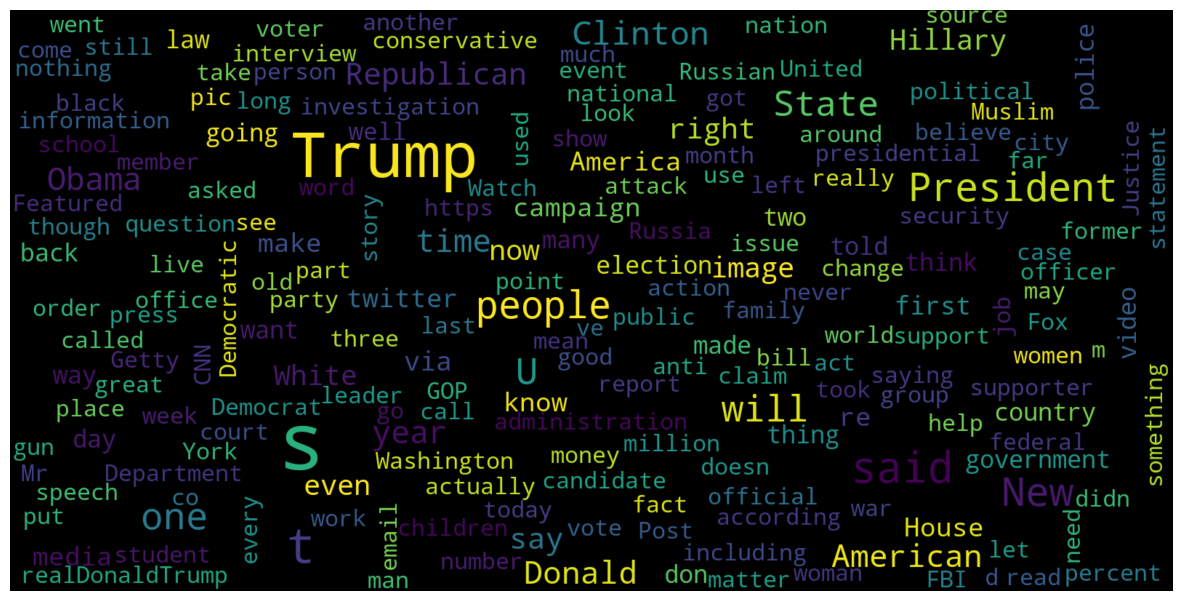

In [31]:
# visualize the WordCloud for fake news

consolidated = ' '.join(
	word for word in df['text'][df['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

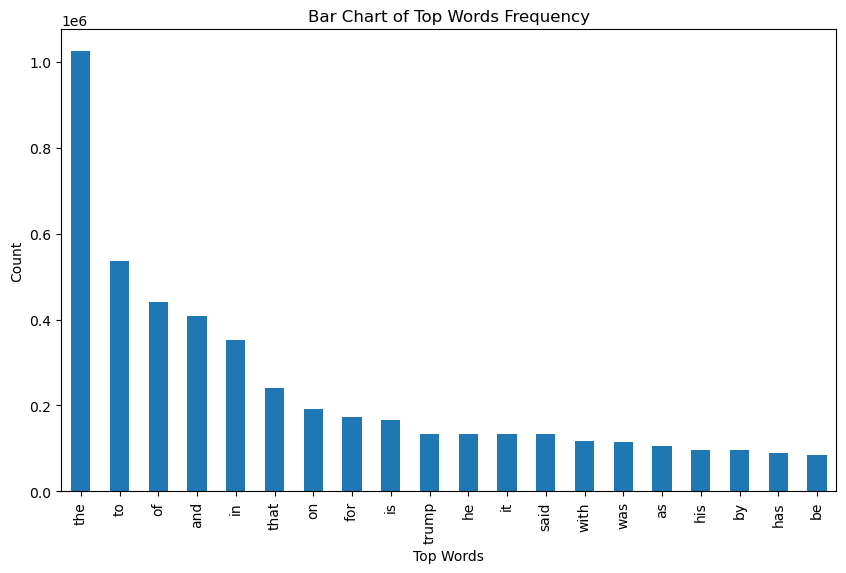

In [49]:
 #plot the bargraph of the top 20 most frequent words.
from sklearn.feature_extraction.text import CountVectorizer
  
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
  
common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

# Converting text into Vectors


In [35]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['text'],df['class'],test_size=0.25)
													
													


In [36]:
# convert the training data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


# Model training, Evaluation and Prediction


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a new logistic regression model and train it on the training data
model = LogisticRegression().fit(x_train, y_train)

# Make predictions on the training and testing data, and calculate accuracy scores
train_acc = accuracy_score(y_train, model.predict(x_train))
test_acc = accuracy_score(y_test, model.predict(x_test))

# Print the accuracy scores
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)


Training accuracy: 0.9915402653685179
Testing accuracy: 0.9858414959928762


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a new decision tree model and train it on the training data
model = DecisionTreeClassifier().fit(x_train, y_train)

# Make predictions on the training and testing data, and calculate accuracy scores
train_acc = accuracy_score(y_train, model.predict(x_train))
test_acc = accuracy_score(y_test, model.predict(x_test))

# Print the accuracy scores
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)


Training accuracy: 1.0
Testing accuracy: 0.9955476402493322


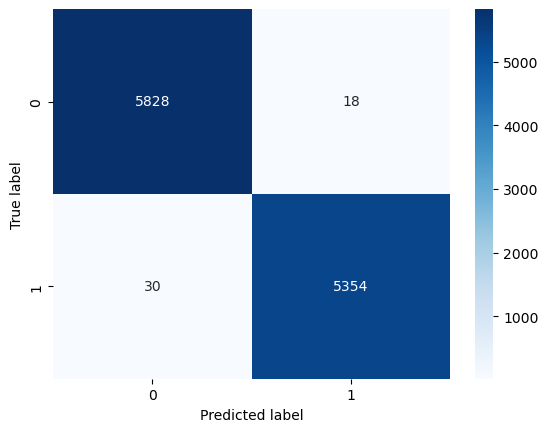

In [41]:
#implemention of confusion matrix for Decision Tree Classifier 
from sklearn.metrics import confusion_matrix


# Generate confusion matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# The resulting plot can help evaluate the performance of the classification model and identify any patterns or biases in its predictions.Decision Tree Classifier and Logistic regression are performing well.